# Project:  Heart attack prediction 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn
import matplotlib

from pathlib import Path
import glob
import logging  

from sklearn.preprocessing import KBinsDiscretizer


plt.rcParams['figure.figsize'] = (14,6)



In [43]:

for name in glob.glob('data/*.csv*xls'):
    print(name)

data/heart.csv.xls
data/o2Saturation.csv.xls


In [44]:
heart = pd.read_csv('./data/heart.csv.xls')
df = heart.copy()

In [45]:
# transform a numerical column

def KBinKBinsDiscretizer(KbinCol):
    kbins = KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='uniform')  #uniform  or quatile
    columns = df[[KbinCol]]
    kbins.fit(columns)
    t = kbins.transform(columns)
    
    edges = kbins.bin_edges_[0].round(1)
    labels = []
    for i in range(len(edges)-1):
        edge1 = edges[i]
        edge2 = edges[i+1]
        labels.append(f"{edge1}_to_{edge2}")

# create a DataFrame
    df_bins = pd.DataFrame(t, columns=labels)
    return df_bins 

In [46]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [47]:
print(df.isna().sum().sort_values(ascending=False))

output      0
thall       0
caa         0
slp         0
oldpeak     0
exng        0
thalachh    0
restecg     0
fbs         0
chol        0
trtbps      0
cp          0
sex         0
age         0
dtype: int64


In [48]:
o2Sat= pd.read_csv('./data/o2Saturation.csv.xls')

In [49]:
o2Sat

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


<ipython-input-50-db8b30ac6398>:1: DeprecationWarning: Applying '+' to a non-numerical array is ill-defined. Returning a copy, but in the future this will error.
  +o2Sat.hist()


array([[<AxesSubplot:title={'center':'98.6'}>]], dtype=object)

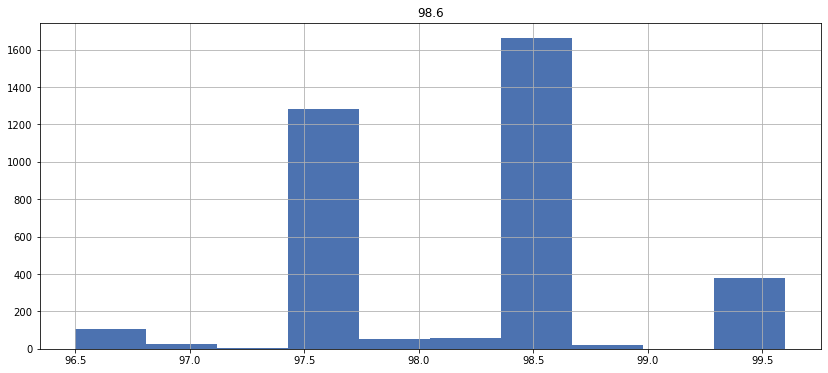

In [50]:
+o2Sat.hist()

Skewness = -0.17982105403495655


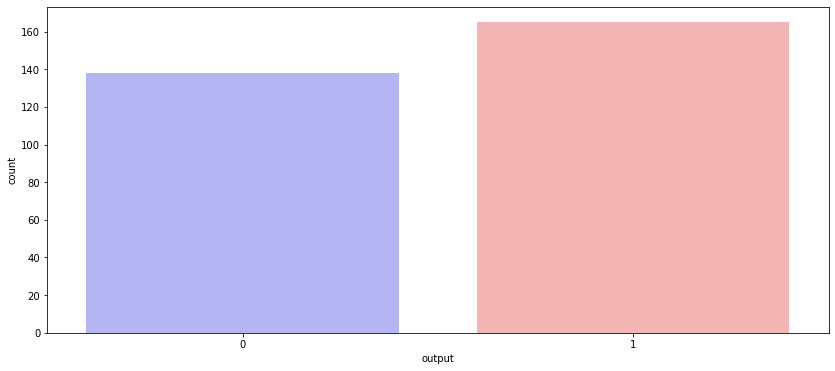

In [51]:
sns.countplot( data=df, x="output", palette="bwr")
print("Skewness = {0}".format(df["output"].skew()))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


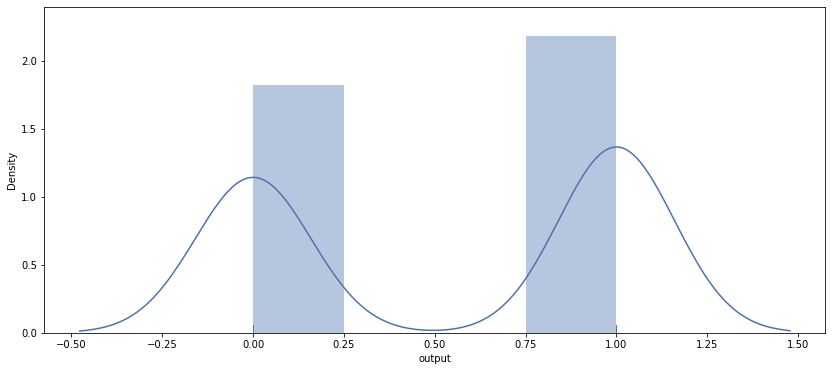

In [52]:
sns.distplot(df['output'],rug=True)
plt.show()

In [53]:
heart.describe(include = "all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
df = heart.copy()

<AxesSubplot:title={'center':'Correlation with output'}>

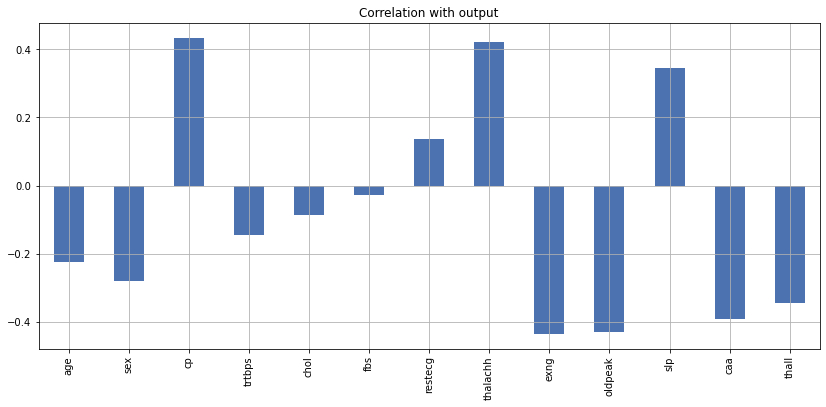

In [55]:
df.drop('output', axis=1).corrwith(df.output).plot(kind='bar' , grid=True, title="Correlation with output" )

<AxesSubplot:title={'center':'Correlation with trtbps'}>

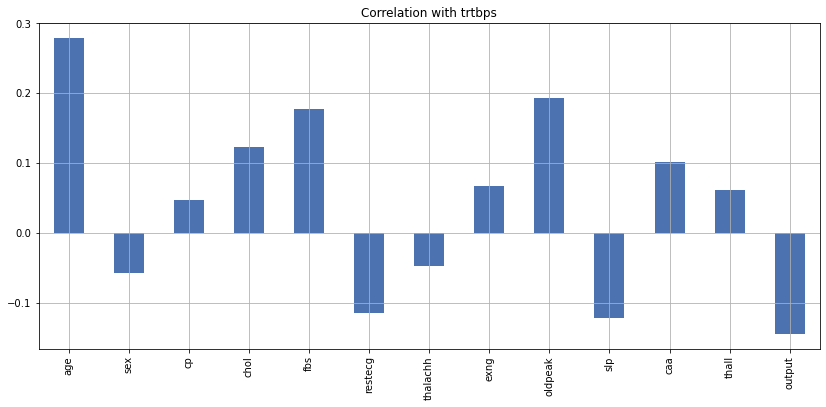

In [56]:
df.drop('trtbps', axis=1).corrwith(df.trtbps).plot(kind='bar' , grid=True, title="Correlation with trtbps")

In [57]:
corr_data = df.corr()
print(corr_data["output"].sort_values(ascending=False)[1:4])
print(corr_data["output"].sort_values(ascending=True)[:3])
corr_data.style.background_gradient(cmap='coolwarm', axis=None).set_precision(6)

cp          0.433798
thalachh    0.421741
slp         0.345877
Name: output, dtype: float64
exng      -0.436757
oldpeak   -0.430696
caa       -0.391724
Name: output, dtype: float64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [58]:
df.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)

In [59]:
df0=df[df['sex']==0]
df0

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [60]:
df0 = df0.rename(columns = {'sex': 'female'}, inplace = False)

In [61]:
df0

,age,female,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [62]:
df1= df[df['sex']==1]

In [63]:
df1= df1.rename(columns = {'sex': 'male'}, inplace = False)

In [64]:
df1

,age,male,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


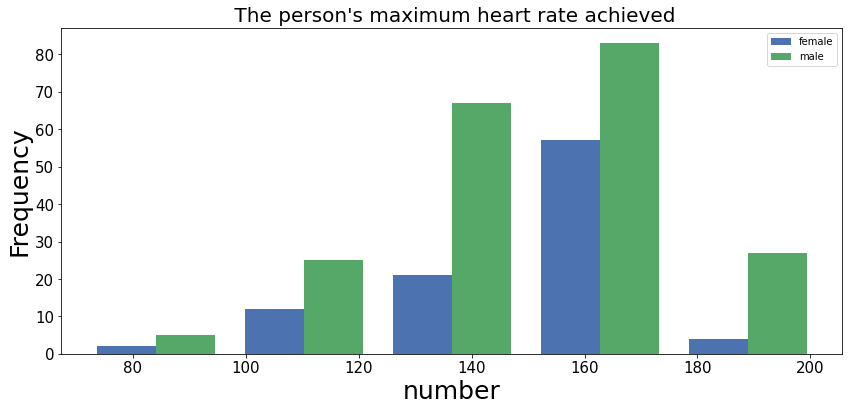

In [65]:
hist1  =  df0['thalachh']
hist2  =  df1['thalachh']
nBins = 5
plt.style.use('seaborn-deep')
#fig = plt.figure(figsize = (13,8))
 
plt.hist([hist1, hist2], nBins, label=['female', 'male'])
plt.legend(loc='upper right')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(" The person's maximum heart rate achieved", fontsize=20)
plt.xlabel('number', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.show()


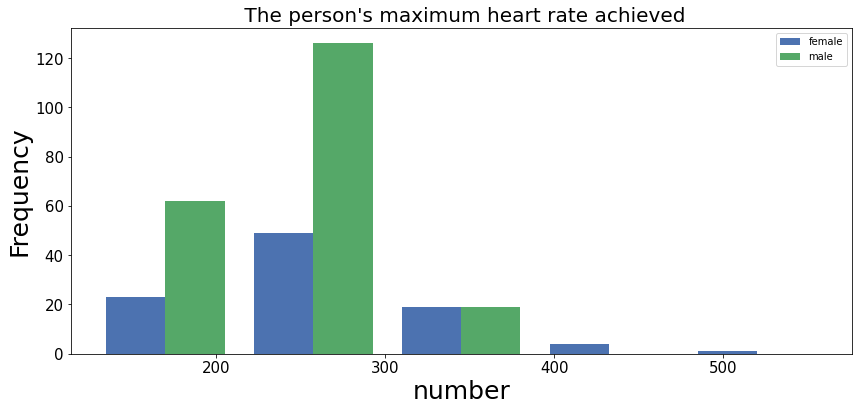

In [66]:
hist1  =  df0['chol']
hist2  =  df1['chol']
nBins = 5
plt.style.use('seaborn-deep')
#fig = plt.figure(figsize = (13,8))
 
plt.hist([hist1, hist2], nBins, label=['female', 'male'])
plt.legend(loc='upper right')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(" The person's maximum heart rate achieved", fontsize=20)
plt.xlabel('number', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.show()


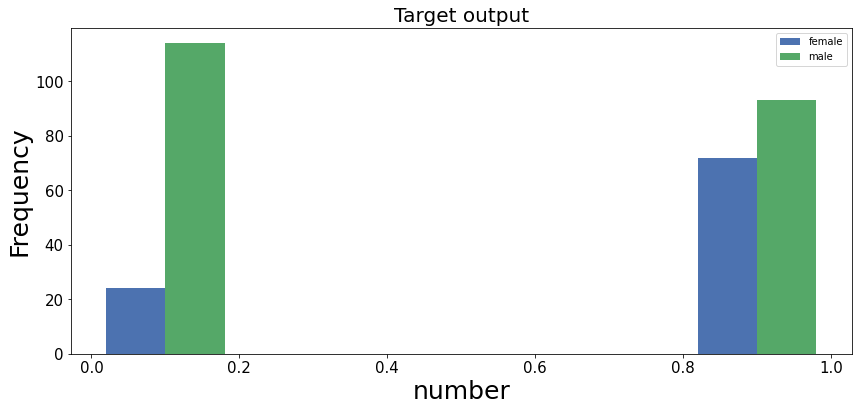

In [67]:
hist1  =  df0['output']
hist2  =  df1['output']
nBins = 5
plt.style.use('seaborn-deep')
#fig = plt.figure(figsize = (13,8))
 
plt.hist([hist1, hist2], nBins, label=['female', 'male'])
plt.legend(loc='upper right')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Target output", fontsize=20)
plt.xlabel('number', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.show()

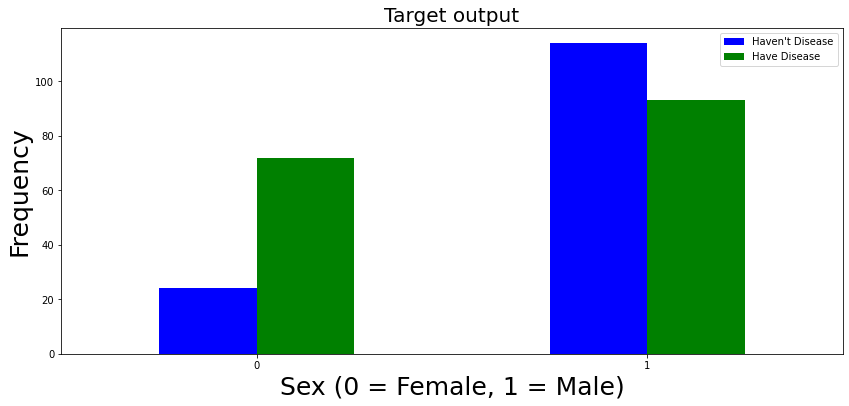

In [70]:
pd.crosstab(df.sex,df.output).plot(kind="bar",color=['blue','green' ])
plt.xlabel('Sex (0 = Female, 1 = Male)',fontsize=25)
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
#plt.ylabel('Frequency')
plt.title("Target output", fontsize=20)
#plt.xlabel('number', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.show()

Text(0.5, 1.0, 'Correlation with Target output')

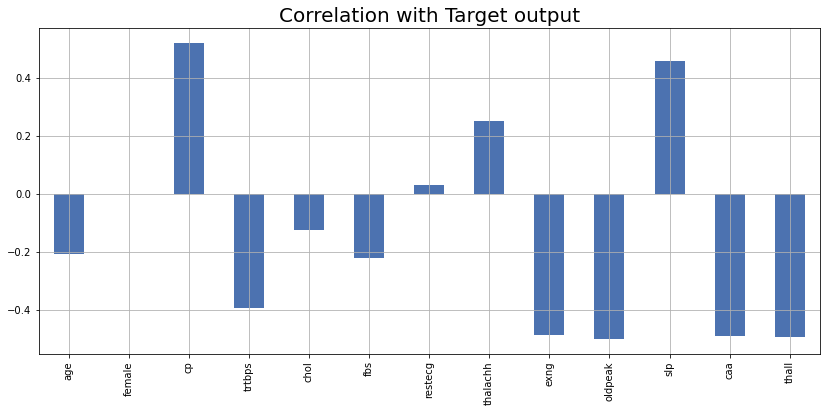

In [73]:
df0.drop('output', axis=1).corrwith(df0.output).plot(kind='bar' , grid=True, title="Correlation with output")
plt.title("Correlation with Target output", fontsize=20)
#plt.xlabel('number', fontsize=25)
#plt.ylabel('Frequency', fontsize=25)

Text(0.5, 1.0, 'Correlation with Target output')

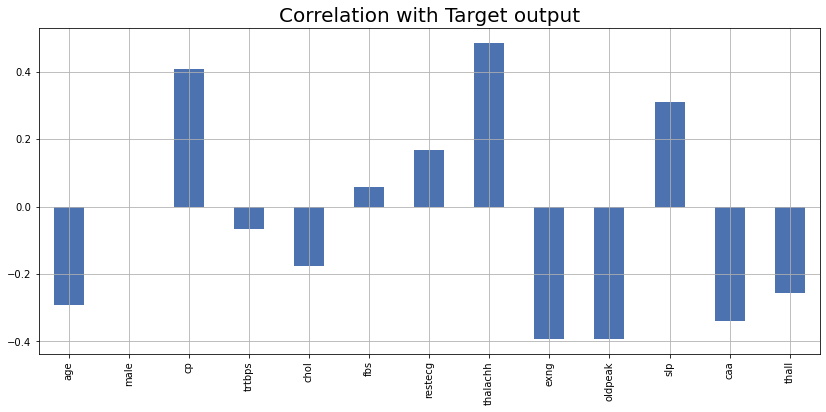

In [74]:
df1.drop('output', axis=1).corrwith(df1.output).plot(kind='bar' , grid=True, title="Correlation with output")
plt.title("Correlation with Target output", fontsize=20)


Average Heart Rate High Prob. Heart Attack: 154.03
Average Heart Rate Low Prob Heart Attack: 142.42



Text(0, 0.5, 'Density')

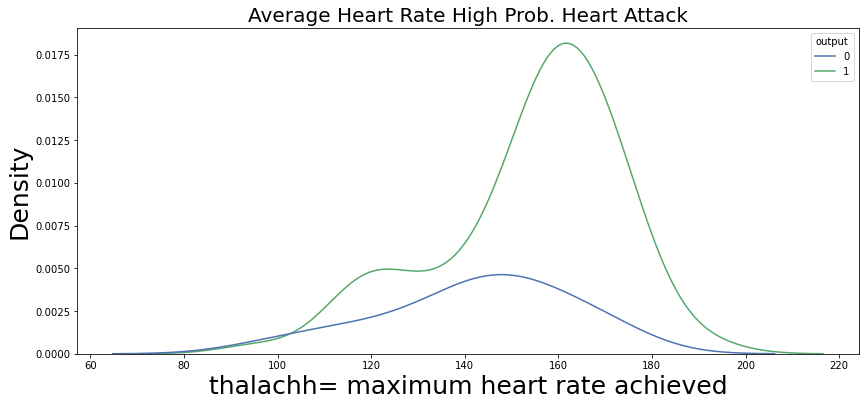

In [81]:
plot1 = seaborn.kdeplot(data = df0, x = "thalachh", hue = "output")
plot1.set_title("Average Heart Rate for female")
print("Average Heart Rate High Prob. Heart Attack: {0:0.2f}\nAverage Heart Rate Low Prob Heart Attack: {1:0.2f}\n".format(df0.loc[df["output"]==1]["thalachh"].mean(),df0.loc[df0["output"]==0]["thalachh"].mean()))

plt.title("Average Heart Rate High Prob. Heart Attack", fontsize=20)
plt.xlabel('thalachh= maximum heart rate achieved', fontsize=25)
plt.ylabel('Density', fontsize=25)

Average Heart Rate High Prob. Heart Attack: 161.90
Average Heart Rate Low Prob Heart Attack: 138.40



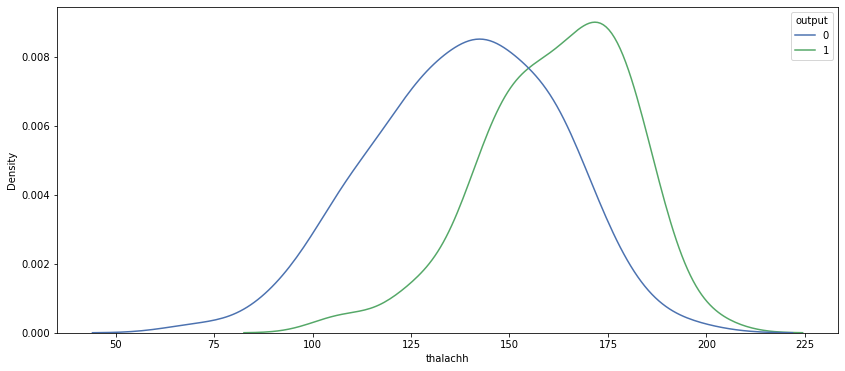

In [29]:
plot2 = seaborn.kdeplot(data = df1, x = "thalachh", hue = "output", color =None)
plot1.set_title("Average Heart Rate for male")
print("Average Heart Rate High Prob. Heart Attack: {0:0.2f}\nAverage Heart Rate Low Prob Heart Attack: {1:0.2f}\n".format(df1.loc[df1["output"]==1]["thalachh"].mean(),df1.loc[df1["output"]==0]["thalachh"].mean()))

Average Chest Pain for female with Low Probability of Heart Attack: 0.17
Average Chest Pain for  female with High Probability of Heart Attack: 1.33




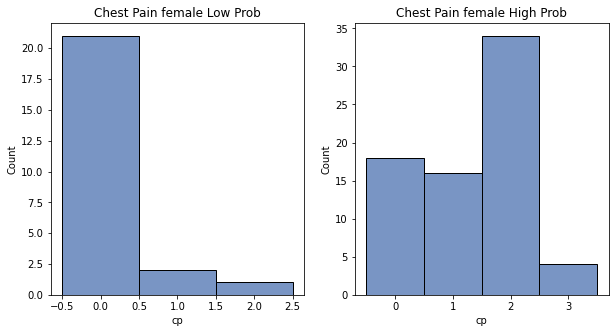

In [30]:
fig, axes = matplotlib.pyplot.subplots(1,2, figsize = (10,5))
plot1 = seaborn.histplot(data = df0.loc[df0["output"]==0], x = "cp", discrete = True, ax = axes[0])
plot1.set_title("Chest Pain female Low Prob")
plot2 = seaborn.histplot(data = df0.loc[df0["output"]==1], x = "cp", discrete = True, ax = axes[1])
plot2.set_title("Chest Pain female High Prob")
print("Average Chest Pain for female with Low Probability of Heart Attack: {0:0.2f}".format(df0.loc[df0["output"]==0]["cp"].mean()))
print("Average Chest Pain for  female with High Probability of Heart Attack: {0:0.2f}\n\n".format(df0.loc[df["output"]==1]["cp"].mean()))


Average Chest Pain for male with Low Probability of Heart Attack: 0.54
Average Chest Pain for  male with High Probability of Heart Attack: 1.41




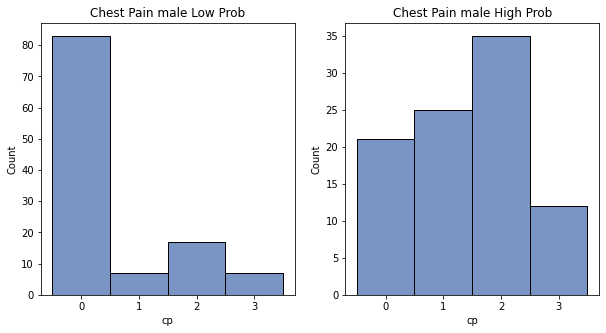

In [31]:
fig, axes = matplotlib.pyplot.subplots(1,2, figsize = (10,5))
plot1 = seaborn.histplot(data = df1.loc[df1["output"]==0], x = "cp", discrete = True, ax = axes[0])
plot1.set_title("Chest Pain male Low Prob")
plot2 = seaborn.histplot(data = df1.loc[df1["output"]==1], x = "cp", discrete = True, ax = axes[1])
plot2.set_title("Chest Pain male High Prob")
print("Average Chest Pain for male with Low Probability of Heart Attack: {0:0.2f}".format(df1.loc[df1["output"]==0]["cp"].mean()))
print("Average Chest Pain for  male with High Probability of Heart Attack: {0:0.2f}\n\n".format(df1.loc[df1["output"]==1]["cp"].mean()))

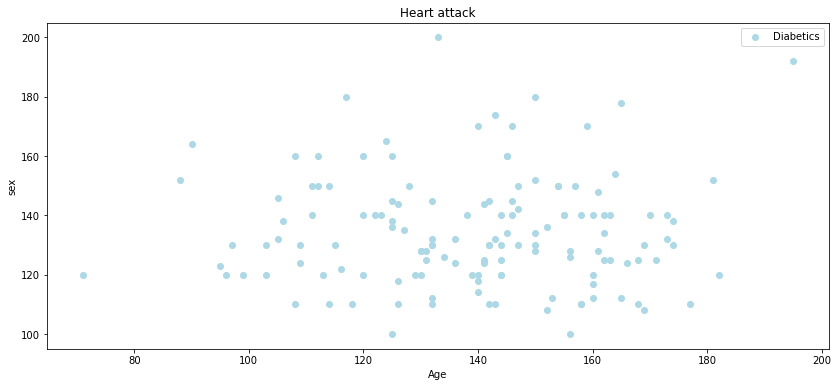

In [36]:
# Scatter with negative examples
plt.scatter(df.thalachh[df.output==0],
           df.trtbps[df.output==0],
           c="lightblue")

# Add some helpful info
plt.title("Heart attack")
plt.xlabel("Age")
plt.ylabel("sex")
plt.legend(["Diabetics","No Diabetics"]);